# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/bank-additional-full.csv", sep = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [ ]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

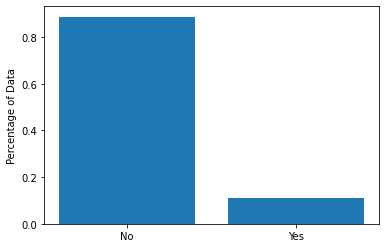

In [ ]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [ ]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_scaled, y_train = smote.fit_resample(X_scaled, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.122\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.464\ngini = 0.312\nsamples = 21020\nvalue = [16952, 4068]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.13\nsamples = 11383\nvalue = [10587, 796]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.108\nsamples = 11126\nvalue = [10486, 640]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.477\nsamples = 257\nvalue = [101, 156]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.318\ngini = 0.448\nsamples = 9637\nvalue = [6365, 3272]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.495\nsamples = 7047\nvalue = [3885, 3162]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.081\nsamples = 2590\nvalue = [2480, 110]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.409\nsamples = 30140\nvalue = [8628, 21512]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.723\ngini = 0.328\nsamples = 24889\nvalue = [5144, 19745]\ncla

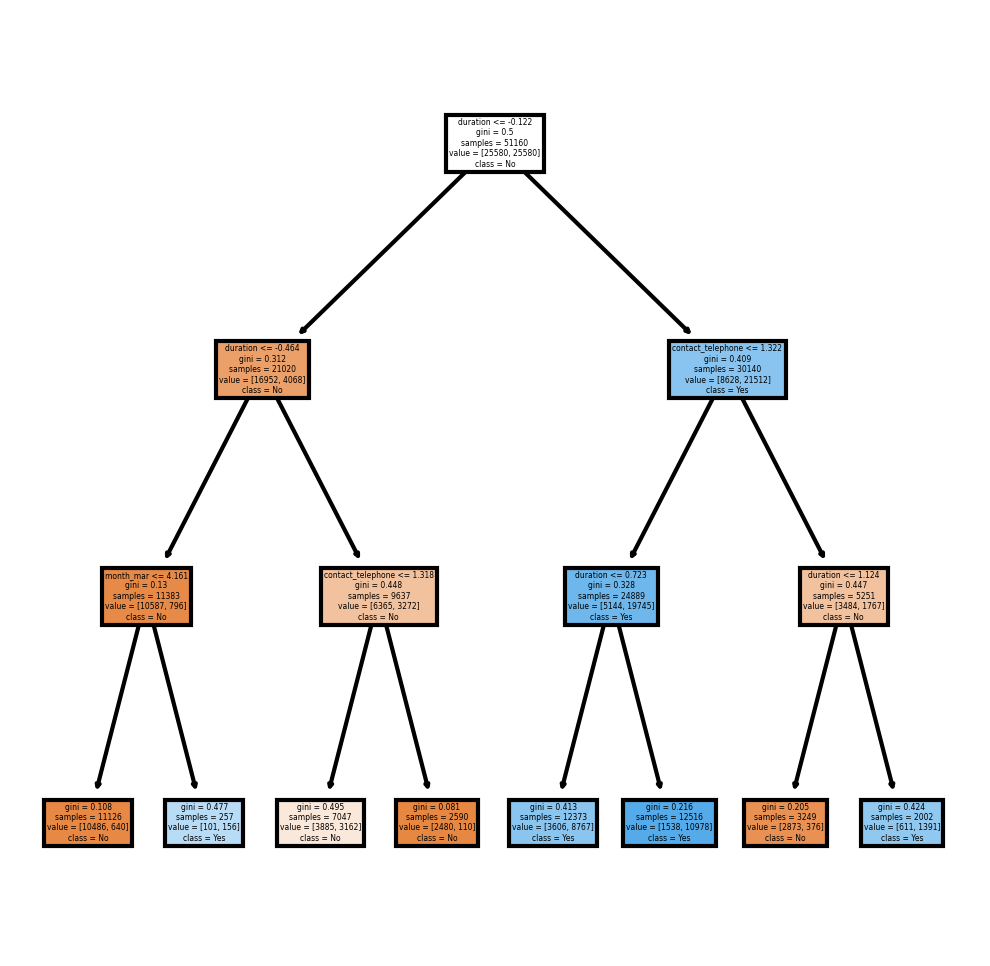

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names = X.columns, class_names=["No","Yes"])     
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [ ]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

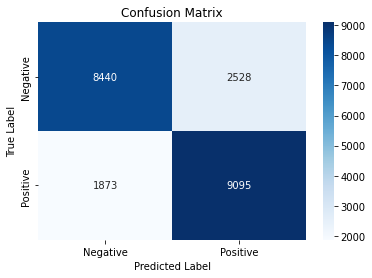

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
               n_estimators=100, 
               max_samples=0.5, 
               max_features=1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8034281546316557


In [ ]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

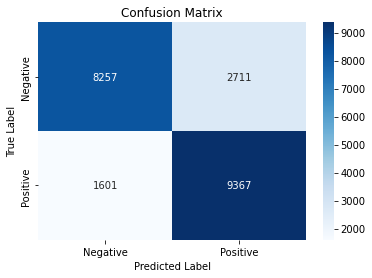

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

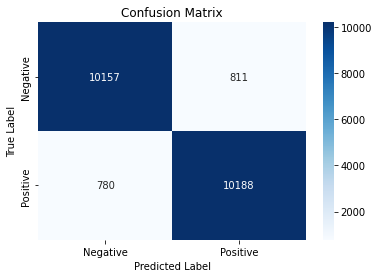

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [ ]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 KB 3.8 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

In [ ]:
### SET YOUR BASE LEARNERS
base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors = 5),
    GradientBoostingClassifier()
]

super_learner = SuperLearner()
super_learner.add(base_estimators)
### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)
### GET base_predictions
base_predictions = super_learner.predict(X_scaled)


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

In [ ]:
### TRAIN YOUR METALEARNER

In [ ]:
log_reg = LogisticRegression(fit_intercept = False).fit(base_predictions,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### INTERPRET COEFFICIENTS

In [ ]:
log_reg.coef_

array([[ 9.68530228, -2.64934713, -4.72380311, -4.31052436,  9.68530228]])

The coefficients indicates how each base base estimators influence the model. To be specific, the coefficients of the logistic regression and gradient boosting are positive, we can increase the weight of these two base predictions in the model to increase prediction accuracy, while random forest, decision tree and KNN have negative influences, and should be assigned less weight.

In [ ]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
y_pred = log_reg.predict(super_learner.predict(X_test))
y_true = y_test
cm_meta = confusion_matrix(y_true, y_pred)

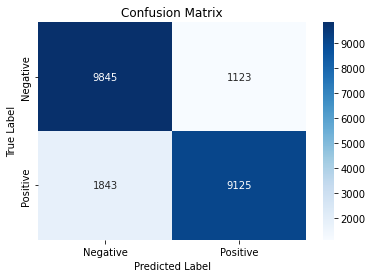

In [ ]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_meta, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities and specificities (Out of Sample)

In [ ]:
# decision tree
sensitivity_raw = cm_raw[0, 0] / (cm_raw[0, 0] + cm_raw[1, 0])
specificity_raw = cm_raw[1, 1] / (cm_raw[0, 1] + cm_raw[1, 1])
# bagged
sensitivity_bag = cm_bag[0, 0] / (cm_bag[0, 0] + cm_bag[1, 0])
specificity_bag = cm_bag[1, 1] / (cm_bag[0, 1] + cm_bag[1, 1])
# boosted
sensitivity_boost = cm_boost[0, 0] / (cm_boost[0, 0] + cm_boost[1, 0])
specificity_boost = cm_boost[1, 1] / (cm_boost[0, 1] + cm_boost[1, 1])
# super learner
sensitivity_meta = cm_meta[0, 0] / (cm_meta[0, 0] + cm_meta[1, 0])
specificity_meta = cm_meta[1, 1] / (cm_meta[0, 1] + cm_meta[1, 1])

In [ ]:
sensitivity = [sensitivity_raw, sensitivity_bag, sensitivity_boost, sensitivity_meta]
specificity = [specificity_raw, specificity_bag, specificity_boost, specificity_meta]

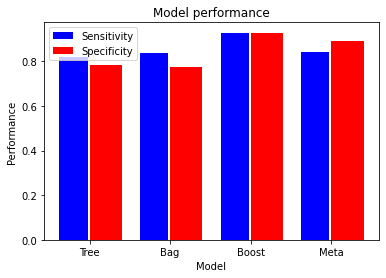

In [ ]:
models = ['Tree', 'Bag', 'Boost', 'Meta']
x = [i for i in range(len(models))]

fig, ax = plt.subplots()
rects1 = ax.bar(x, sensitivity, width=0.35, color='b', label='Sensitivity')
rects2 = ax.bar([i + 0.4 for i in x], specificity, width=0.4, color='r', label='Specificity')

ax.set_xlabel('Model')
ax.set_ylabel('Performance')
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(models)
ax.legend()
ax.set_title('Model performance')
plt.show()